In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from lcmcmc.utils import get_data_dir_path

In [3]:
#Load the data for the header file and photometric file.
path_perfect_sims_phot = "/sps/lsst/users/bbiswas/data/kilonova_datasets/RESSPECT/RESSPECT_PERFECT_LIGHTCURVE_WITH_KN.csv"
path_perfect_sims_head = "/sps/lsst/users/bbiswas/data/kilonova_datasets/RESSPECT/RESSPECT_PERFECT_HEAD_WITH_KN.csv"

df_head = pd.read_csv(path_perfect_sims_head)
df_phot = pd.read_csv(path_perfect_sims_phot)

In [4]:
#extract the objects as in the KN paper 

selected_ids = np.load(os.path.join(get_data_dir_path(), "selected_ids.npy"))

df_head = df_head[df_head["SNID"].isin(list(selected_ids))]
df_phot = df_phot[df_phot["SNID"].isin(list(selected_ids))]

In [5]:
# Use only g and r band

mask = (df_phot['FLT'] == 'g') | (df_phot['FLT'] == 'r')
df_phot = df_phot[mask]

# Preprocessing

In [6]:
from lcmcmc.preprocessing import add_object_band_index, preprocess_SNANA, extract_subsample

In [7]:
df_head, df_phot=extract_subsample(df_head=df_head, df_phot=df_phot, event_type="random", num_sample=50)

In [8]:
df_phot

,SNID,MJD,FLT,FLUXCAL,FLUXCALERR,SNR
107335,3239.0,53034.0,g,-0.253115,0.141841,-1.784502
107336,3239.0,53034.0,r,0.298226,0.142888,2.087133
107341,3239.0,53036.0,g,0.010519,0.141878,0.074138
107342,3239.0,53036.0,r,0.083268,0.142134,0.585842
107347,3239.0,53038.0,g,0.037330,0.141972,0.262939
...,...,...,...,...,...,...
5491473,10979.0,53114.0,r,0.000379,0.003937,0.096141
5491474,10979.0,53116.0,r,0.001423,0.003217,0.442296
5491475,10979.0,53118.0,r,-0.001008,0.003231,-0.312068
5491476,10979.0,53120.0,r,-0.000818,0.006007,-0.136134


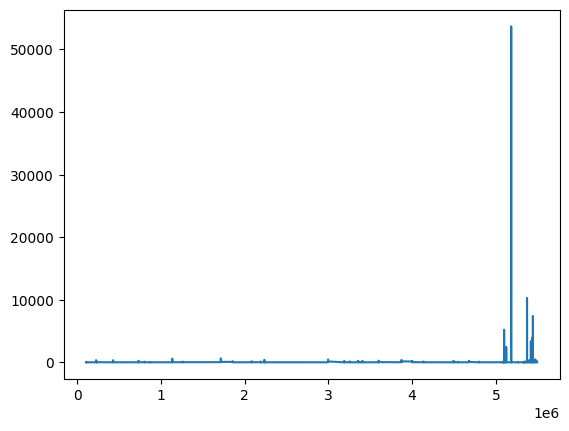

In [14]:
import matplotlib.pyplot as plt
plt.plot(df_phot["SNR"])

In [9]:
df_phot = add_object_band_index(df_phot)

In [11]:
# get only 20 days of data before and after maximum 

new_object_df = preprocess_SNANA(df_head=df_head, df_phot=df_phot)
new_object_df = new_object_df[((new_object_df["time"]>-10) & (new_object_df["time"]<20))]
new_object_df = new_object_df[new_object_df["time"]%6==0]

In [12]:
data_dir = get_data_dir_path()
new_object_df.to_csv(os.path.join(data_dir, "perfect_sims.csv"))